<a href="https://colab.research.google.com/github/Kaviya-22/Kaviya-22/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required Libraries**

In [ ]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.4 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055391 sha256=f4bd98742cd00dcd09098c26ea6c233f0725692fc1489d0002d37b4e91ea32b3
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
import cv2
import insightface
import numpy as np
np.int = int

**Configure params**

In [ ]:
providers = ["CPUExecutionProvider"]

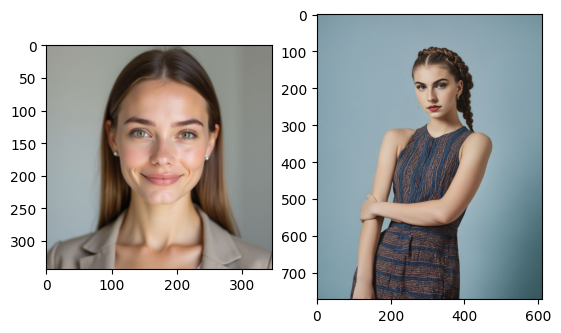

In [ ]:
target_frame = cv2.imread('/content/PIC1.png')
src_frame = cv2.imread("/content/PIC2.png")
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(src_frame, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB))
plt.show()

**Identify faces**

In [ ]:
FACE_ANALYSER = insightface.app.FaceAnalysis(
                    name="buffalo_l",
                    root=".", providers=providers,allowed_modules=["landmark_3d_68", "landmark_2d_106","detection","recognition"]
                )
FACE_ANALYSER.prepare(
                ctx_id=0,
                det_size=(640, 640),
            )

download_path: ./models/buffalo_l


100%|██████████| 281857/281857 [00:10<00:00, 26203.08KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


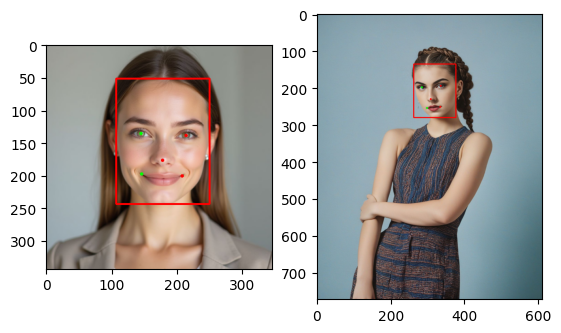

In [ ]:
src_faces = FACE_ANALYSER.get(src_frame)
target_faces = FACE_ANALYSER.get(target_frame)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
rimg = FACE_ANALYSER.draw_on(src_frame,src_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
ax1 = fig.add_subplot(1,2,2)
rimg = FACE_ANALYSER.draw_on(target_frame,target_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
plt.show()

**Face Swapper**

In [ ]:
model_path = '/content/inswapper_128.onnx'
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
img_fake = model_swap_insightface.get(img = target_frame, target_face=FACE_ANALYSER.get(target_frame)[0], source_face=src_faces[0], paste_back=True)

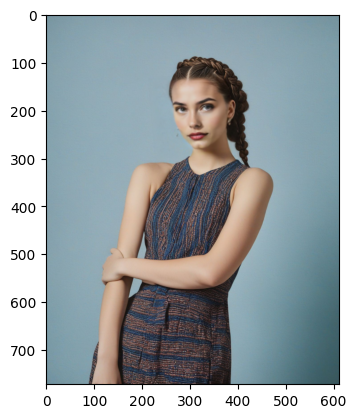

In [ ]:
plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('swapedFace.jpg',img_fake)

True